<a href="https://colab.research.google.com/github/aszapla/Curso-DL/blob/master/1_5_Deep_Learning_con_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/keras-logo.png" height="100"></center>
 
# 1.5 Deep Learning con Keras 

Profesor: Juan Ramón Rico (<juanramonrico@ua.es>)

Los ejemplos que se presentarán a continuación están basados en la documentación introductoria de [Keras](https://keras.io/).

## Resumen
---
**Keras** es un paquete que permite la creación y prueba de redes neuronales avanzadas (Deep Learning). Tiene una sintaxis sencilla que permite modelar rápido
- Documentación <https://keras.io/>
- Tutorial de inicio rápido <https://elitedatascience.com/keras-tutorial-deep-learning-in-python>    
---


# Redes neuronales

## Neurona de un ser vivo

<center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/impulso_nervioso.gif" height="300"></center>


## Perceptrón multicapa

Conocido normalmente por sus siglas en inglés MLP (Multilayer Perceptron).


<center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/mlp.png" height="300"></center>

## Topologías

<center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/ann_topologies.png" ></center>

## Cronología de aportaciones destacables en las redes neuronales

<center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/dl_timeline.png" ></center>

> [Geoffrey Hinton](https://en.wikipedia.org/wiki/Geoffrey_Hinton) (británico) psicólogo cognitivo e informático. Destaca por sus aportaciones en las redes neuronales artificiales desde los años 80 hasta la actualidad (MLP, back-propagation, Bolzmann Machine Net., Deep Belief Net., Dropout, Capsule Net.). Desde 2013 divide su tiempo trabajando para Google ([Google Brain](https://en.wikipedia.org/wiki/Google_Brain)) y la Universidad de Toronto.

 <center><img src="https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/images/hinton.png"></center>

# Keras

[Keras](https://keras.io/) es una API de redes neuronales de alto nivel, escrita en Python y capaz de ejecutarse sobre [TensorFlow](https://www.tensorflow.org/) (Google), [CNTK ](https://www.microsoft.com/en-us/cognitive-toolkit/) (Microsoft) o [Theano](http://deeplearning.net/software/theano/) y próximamente en [MxNet](https://mxnet.incubator.apache.org/) (Amazon). Fue desarrollado con el objetivo de permitir una rápida experimentación. Poder pasar de la idea al resultado en el menor tiempo posible es clave para realizar una buena investigación.

Utiliza Keras si necesitas una biblioteca de Deep Learning que:

- Permite un prototipado fácil y rápido (a través de la facilidad de uso, modularidad y extensibilidad).
- Soporte tanto redes convolucionales como redes recurrentes, así como combinaciones de ambas.
- Se ejecute en la CPU y la GPU.

Basado en los principios de:

- **Facilidad de uso**  Keras es una API diseñada para seres humanos, no para máquinas. Pone la experiencia del usuario en primer plano. Keras sigue las mejores prácticas para reducir la carga cognitiva: ofrece APIs consistentes y simples, minimiza el número de acciones de usuario requeridas para casos de uso común, y proporciona una retroalimentación clara y procesable sobre el error del usuario.

- **Modularidad**: Un modelo se entiende como una secuencia o un gráfico de módulos independientes, totalmente configurables, que pueden conectarse entre sí con las mínimas restricciones posibles. En particular, las capas neuronales, las funciones de coste, los optimizadores, los esquemas de inicialización, las funciones de activación y los esquemas de regularización son módulos independientes que puede combinar para crear nuevos modelos.

- **Permite una extensión fácil**:  Los nuevos módulos son fáciles de añadir (como nuevas clases y funciones), y los módulos existentes proporcionan amplios ejemplos. El poder crear fácilmente nuevos módulos permite una expresividad total, haciendo que Keras sea adecuado para la investigación avanzada.

- **Trabaja con Python**: No hay archivos de configuración de modelos separados en formato declarativo. Los modelos se describen en código Python, que es compacto, más de depurar y permite su extensión fácilmente.

# Ejemplos básicos

## Copiar los datos en Google Colab

In [0]:
# Hay que copiar los archivos de ejemplo
!wget https://www.dlsi.ua.es/~juanra/UA/curso_verano_DL/data/basic_data.zip
!unzip basic_data

## Crear y entrenar un modelo

Los modelos de Keras se entrenan con matrices de datos de entrada y etiquetas de `Numpy` o tablas de datos de `Pandas`. Para entrenar un modelo se utiliza la función `fit` ([más información](https://keras.io/models/sequential/)).

En este primer ejemplo cargaremos un fichero de datos CSV con dos clases objetivo (si está enfermo o no) y entrenaremos un MLP con todos los datos.

## MLP para clasificación binaria

Este primer planteamiento simplemente es para comprobar si la implementación de nuestra red es correcta.

In [0]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# Clasificación binaria con el fichero 'diabetes_01.csv'
data = pd.read_csv('./basic_data/diabetes_01.csv')
for i in data.columns:
  if (data[i].dtype == 'int64'):
    data[i]= data[i].astype('int32')
  if (data[i].dtype == 'float64'):
    data[i]= data[i].astype('float32')

# Selección de atributos y variable objetivo
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Para un modelo con una entrada de datos numéricos y para clasificar 2 clases (binary classification):
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=x.shape[1]))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo, iterando con los datos en grupos de 32 muestras
model.fit(x, y, epochs=50, batch_size=32)

En el ejemplo anterior se entrena sobre todos los datos disponibles con lo la tasa de aciertos  finales no sabemos si son fiables o no.

Para ello, vamos a dividir los datos en un par de conjuntos para poder entrenar con uno y testear con el otro.

Vamos a evitar el sobre-entrenamiento (overfitting) con una función llamada `Dropout` que se verá con detenimiento en siguiente sesión.

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Clasificación binaria con el fichero 'diabete_01.csv'
data = pd.read_csv('./basic_data/diabetes_01.csv')

pares = {'int64':'int32', 'float64':'float32'}
for i in data.columns:
  pareja = pares.get(str(data[i].dtype))
  if pareja != None:
    data[i]= data[i].astype(pareja)

# Selección de atributos y variable objetivo
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Dividir los datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=123)

model = Sequential()
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=50, batch_size=32)
loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test accuracy {}'.format(accuracy))

## Clasificación con Multilayer Perceptron (MLP) para diversas clases (softmax):

* Ahora vamos a trabajar de nuevo sobre el conjunto de datos llamado [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set).

* Además tenemos tres categorias (iris-setosa, iris-virginica e iris-versicolor) que convertiremos a identificadores (0, 1 y 2) con `LabelEncoder`;

* Las categorías en redes necesitan una codificación binaria excluyente llamada **one hot**, es decir, la representación sería 0 (1,0,0), 1 (0,1,0) y 2 (0,0,1).

* En esta ocasión también crearemos un par de conjuntos disjuntos; uno para entrenar y el otro para testear los resultados.



In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical

# Clasificación múltiple con el fichero 'iris.csv'
label_enc = LabelEncoder()
data = pd.read_csv('./basic_data/iris.csv')
x = data.iloc[:,:-1]
y = label_enc.fit_transform(data.iloc[:,-1])

# Dividir los datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=123)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
# Dense(64) es una capa de conexión completa con 64 neuronas ocultas.
# en la primera capa se tiene que especificar la dimensión de la entrada de datos.
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) # Número de clases finales

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=32)
loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test accuracy {}'.format(accuracy))

Epoch 1/20
135/135 [==============================] - 1s 8ms/step - loss: 1.6758 - acc: 0.3407
Epoch 2/20
135/135 [==============================] - 0s 211us/step - loss: 1.2516 - acc: 0.3630
Epoch 3/20
135/135 [==============================] - 0s 184us/step - loss: 0.9786 - acc: 0.5333
Epoch 4/20
135/135 [==============================] - 0s 175us/step - loss: 0.8149 - acc: 0.6148
Epoch 5/20
135/135 [==============================] - 0s 185us/step - loss: 0.7768 - acc: 0.6148
Epoch 6/20
135/135 [==============================] - 0s 186us/step - loss: 0.6363 - acc: 0.6889
Epoch 7/20
135/135 [==============================] - 0s 184us/step - loss: 0.5730 - acc: 0.7259
Epoch 8/20
135/135 [==============================] - 0s 189us/step - loss: 0.5829 - acc: 0.7333
Epoch 9/20
135/135 [==============================] - 0s 190us/step - loss: 0.6504 - acc: 0.6370
Epoch 10/20
135/135 [==============================] - 0s 213us/step - loss: 0.5268 - acc: 0.6815
Epoch 11/20
135/135 [==========

**Ejercicio**: Probar con el valor de `SGD` por defecto.

¿Qué ocurre?

## MLP para regresión

Vamos a mostrar un ejemplo para calcular un valor final. Nos basaremos en el conjunto de datos de `Boston House Prices` incluida en el paquete `sklearn`.

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
boston_x, boston_y = boston.data.astype('float32'), boston.target.astype('float32')
print(boston.DESCR)

x_train, x_test, y_train, y_test = train_test_split(boston_x, boston_y, test_size=0.1, random_state=123)

### Prueba con entrenamiento y test

Para esta prueba necesitamos escalar los diferentes indicadores, ya que tienen diferentes rangos de valores (`StandardScaler`).

In [0]:
import numpy as np
import sklearn as sk
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Para un modelo para calcular una regresión
def build_mlp_reg():
  model = Sequential()
  model.add(Dense(32, activation='relu', kernel_initializer='normal', input_dim=x_train.shape[1]))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_absolute_error')
  
  return model

# Necesitamos ajustar los rangos de las entradas (x) y las salidas (y)
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_train_scaler, y_train_scaler = x_scaler.fit_transform(x_train), y_scaler.fit_transform(y_train.reshape(-1,1))
x_test_scaler, y_test_scaler = x_scaler.fit_transform(x_test), y_scaler.fit_transform(y_test.reshape(-1,1))

# Construir el modelo
model = build_mlp_reg()

# Entrenar el modelo, iterando con los datos en grupos de 8 muestras
model.fit(x_train_scaler, y_train_scaler, epochs=100, batch_size=8)

# Probar el conjunto de test
y_pred = y_scaler.inverse_transform(model.predict(x_test_scaler))
score = sk.metrics.mean_absolute_error(y_test, y_pred)
print('mean absolute error: {:.2f}'.format(score))

# Suponemos que queremos predecir una nueva muestra
print(boston.feature_names)
x_new = np.array([x_test_scaler[-1]]) # Última muestra de test
print('Características: {}'.format(x_new[0]))
print('Predicción: {}'.format(y_scaler.inverse_transform(model.predict(x_new))[0]))
print('Valor real: {}'.format(y_test[-1]))

### Validación cruzada

Vamos a comparar los resultados de esta regresión MLP usando una validación cruzada de 10 con los resultados del tema previo.

Usaremos el método `KerasRegressor` para comunicar los modelos de `Keras` con la utilidades de `sklearn`.

In [0]:
%%capture --no-stdout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

name='mlp'
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=build_mlp_reg, epochs=100, batch_size=8, verbose=0)))
pipeline = Pipeline(estimators)
cv = KFold(n_splits=10, random_state=123)  
results = -np.round(cross_val_score(pipeline, boston_x, boston_y, scoring='mean_absolute_error', cv=cv),2)
print('{:20s} media: {:.02} resultados: {}'.format(name,results.mean(), results))

# Ejemplos avanzados

En este enlace, <https://github.com/keras-team/keras/tree/master/examples>, tenemos más ejemplos completos para comenzar con conjuntos de datos reales:

- CIFAR10 clasificación de imágenes: Convolutional Neural Network (CNN) con aumentado de datos en tiempo real;
- IMDB clasificación de comentarios sobre películas según su sentimiento (positivos/negativo): LSTM sobre secuencias de palabras;
- Reuters clasificación sobre características de noticias: Multilayer Perceptron (MLP)
- MNIST clasificación de dígios manuscritos aislados: MLP & CNN;
- Generación de texto a nivel de carácter redes tipo LSTM


## Capas de atención para un MLP:

* Como en el apartado anterior vamos a trabajar sobre el conjunto de datos llamado [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set).

* Además tenemos tres categorias (iris-setosa, iris-virginica e iris-versicolor) que convertiremos a identificadores (0, 1 y 2) con `LabelEncoder`;

* Las categorías en redes necesitan una codificación binaria excluyente llamada **one hot**, es decir, la representación sería 0 (1,0,0), 1 (0,1,0) y 2 (0,0,1).

* Vamos a crear una capa de atención y vamos a visualizar lo que aprende.



In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import keras
from keras.models import Model
from keras.layers import Input, Dense, Multiply
from keras.utils import to_categorical

def build_model(input_dim):
    inputs = Input(shape=(input_dim,))

    # La parte de atención comienza aquí
    attention_probs = Dense(input_dim, activation='softmax', name='attention_vec')(inputs)
    attention_mul = Multiply(name='attention_mul')([inputs, attention_probs])
    # La parte de atención finaliza aquí

    attention_mul = Dense(64)(attention_mul)
    output = Dense(3, activation='softmax')(attention_mul) # 3 el número de clases
    model = Model(input=[inputs], output=output)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Clasificación múltiple con el fichero 'iris.csv'
label_enc = LabelEncoder()
data = pd.read_csv('./basic_data/iris.csv')
x = data.iloc[:,:-1]
y = label_enc.fit_transform(data.iloc[:,-1])

# Dividir los datos en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=123)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = build_model(x_train.shape[1]) # Tamaño de la entrada

model.fit(x_train, y_train, epochs=50, batch_size=32)
loss, accuracy = model.evaluate(x_test, y_test, batch_size=32)
print('Test accuracy {}'.format(accuracy))

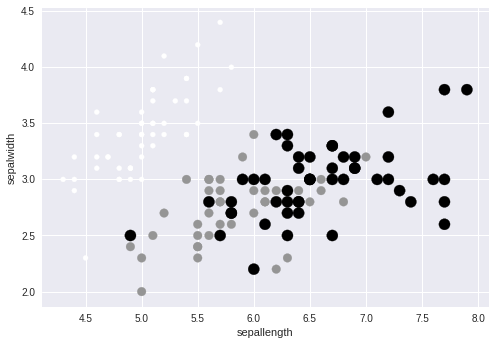

In [0]:
data.plot.scatter(x='sepallength', y='sepalwidth', c=y, s=25+y*50)

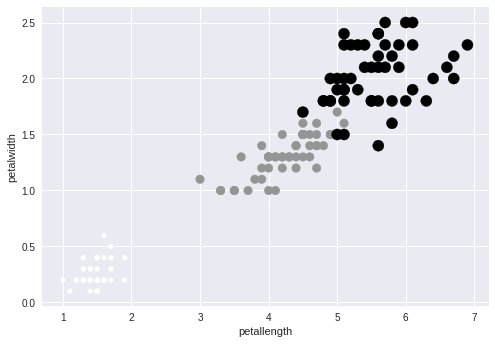

In [0]:
data.plot.scatter(x='petallength', y='petalwidth', c=y, s=25+y*50)

vector de atención: [0.15362889 0.05237302 0.00186193 0.7921362 ]


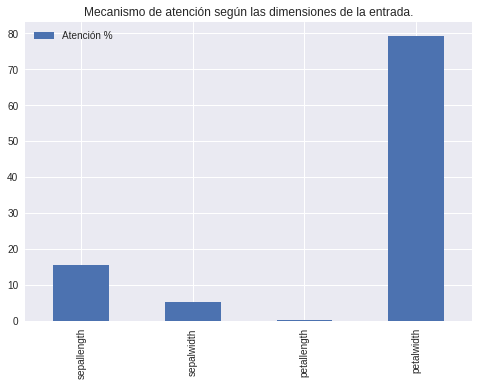

In [0]:
#
# Resultados de atención en el test según las dimensiones de la entrada
#
import numpy as np
attention_mode = Model(inputs=model.input, outputs=model.get_layer('attention_vec').output)
attention_vector = np.mean(attention_mode.predict(x_test),axis=0)

print('vector de atención: {}'.format(attention_vector))
pd.DataFrame(attention_vector*100.0,columns=['Atención %']).rename(index={i:data.columns[i] for i in range(4)}).plot(
    kind='bar', title='Mecanismo de atención según las dimensiones de la entrada.')


---

# Resumen

* Introducción intuitiva a las redes neuronales atificiales.

* **Keras** paquete básico para comenzar a usar **Deep Learning**.

* La red básica es el MLP (Multilayer Perceptron) pero existen multitud de topologías. Las más importantes se estudiarán en las próximas sesiones.

* Se han presentado algunos ejemplos con **Keras** para solucionar problemas similares a los estudiados en el tema anterior con `sklearn`.

* En redes neuronales es habitual tener que **reestructurar de los datos** con `reshape` (`Numpy`) y ajustar la escala de valores con `StandardScaler` (`sklearn`) o similares.